<a href="https://colab.research.google.com/github/ihrutvik/APK_Workshop/blob/master/iris__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!p7zip -d '/content/drive/MyDrive/IITD_database.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 139171336 bytes (133 MiB)

Extracting archive: /content/drive/MyDrive/IITD_database.7z
--
Path = /content/drive/MyDrive/IITD_database.7z
Type = 7z
Physical Size = 139171336
Headers Size = 15669
Method = LZMA:24
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./IITD Database/Normalized_Images/001_1.bmp
  Size:     21814 bytes (22 KiB)
  Modified: 2007-07-06 16:36:34
with the file from archive:
  Path:     IITD Database/Normalized_Images/001_1.bmp
  Size:     21814 bytes (22 KiB)
  Modified: 2007-07-06 16:36:34
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (

In [225]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


In [226]:
from keras.preprocessing import image 
import numpy as np

In [227]:
img_path = '/content/IITD Database/Normalized_Images/001_2.bmp'
 
img = image.load_img(img_path, target_size=(48, 432))
img_tensor=image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 

# that were preprocessed in the folloving vay:

img_tensor /= 255.

# Its shape is (1, 150, 150, 3)

print (img_tensor.shape)

(1, 48, 432, 3)


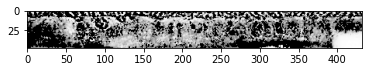

In [205]:
import matplotlib.pyplot as plt

plt.imshow (img_tensor [0]) 
plt.show()

In [206]:
import numpy as np # lineer algebra 
import pandas as pd # data processing, CSV file I/O

# imports needed for CNN

import csv
import cv2
import os, glob 
import pandas as pd
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split 
import time
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm


from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from matplotlib import pyplot as plt

from keras.utils import np_utils

In [207]:
from keras.optimizers import SGD

In [228]:
import os
from keras.preprocessing import image
import numpy as np
import random

In [232]:
img_data_list=[] 
label_list=[]
img_data_list1=[]
img_data_list2=[] 
img_data_list3=[]
img_data_list4=[]
img_data_list5=[] 
label_list1=[]
label_list2=[]
label_list3=[]
label_list4=[]
label_list5=[]



In [233]:
for file in os.listdir("/content/IITD Database/Normalized_Images/"):
  if file.endswith(".bmp"):
    #for dataset in os. Listdir("Normalized_Images/"):
      img_path= '/content/IITD Database/Normalized_Images/' + file
      img =image.load_img(img_path, target_size=(200, 150))
      img_tensor= image.img_to_array(img)
      #img tensor = np.expand_dims (img_tensor, axis=0)
      #img tensor /= 255.
      img_data_list.append(img_tensor)
      label_list.append(file [0:3])
      if file [4:5]=='1':
        img_data_list1.append(img_tensor)
        label_list1.append(file [0:3])
      if file [4:5] == '2':
        img_data_list2.append(img_tensor) 
        label_list2.append(file [0:3])
      if file [4:5]=='3':
        img_data_list3.append(img_tensor) 
        label_list3.append(file [0:3])
      if file [4:5]=='4':
        img_data_list4.append(img_tensor) 
        label_list4.append(file [0:3])
      if file [4:5] == '5':
        img_data_list5.append(img_tensor) 
        label_list5.append(file[0:3])

In [235]:
import gc 
gc.collect()
#trein ing

train_img= np.array(img_data_list1)
train_img= np.append (train_img, np.array(img_data_list2),axis=0)
train_img= np.append(train_img, np.array(img_data_list3), axis=0) 
train_img =np. append (train_img, np.array(img_data_list4), axis=0)
#strain inging data.astype ("float32")

train_img/= 255

#train label

train_label= np.array(label_list1) 
train_label= np.append(train_label, np.array(label_list2), axis=0)
train_label= np.append(train_label, np.array(label_list3), axis=0)
train_label= np.append(train_label, np.array(label_list4), axis=0)

#test ing 
test_img= np.array(img_data_list4)

#test_ing test_img.astype ("float:32")

test_img /=255 

test_label= np.array(label_list4) #validate ing 
validate_img= np.array(img_data_list5) 
#frelidate ing=validate ing.aatype('float:32')
validate_img /= 255 #validate label

validate_label= np.array(label_list5)

In [236]:
train_label.shape

(896,)

In [237]:
from keras.utils import np_utils
train_label= np.array(train_label)
test_label= np.array(test_label) 
train_label= np_utils.to_categorical(train_label)
test_label=np_utils.to_categorical (test_label)
validate_label= np_utils.to_categorical(validate_label)
num_classes= train_label.shape[1]
print ("Data normalized and hot encoded.") 
print (num_classes)

Data normalized and hot encoded.
225


In [238]:
print('After Conversion to one-shot:' ,train_label[10])

After Conversion to one-shot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [239]:
test_img.reshape (-1, 200, 150,3)

train_img.reshape (-1, 200, 150,3)

validate_img.reshape (-1, 200, 150,3)

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [240]:
def createCNNmodel(num_classes):
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, input_shape=(200, 150,3), border_mode='same', activation ='relu',W_constraint =maxnorm(3)))
  model.add(Convolution2D(32, 3, 3, activation ='relu', border_mode='same',W_constraint =maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense (512, activation='relu', W_constraint = maxnorm(3))) 
  model.add(Dropout (0.6)) 
  model.add(Dense (num_classes, activation='softmax'))
  epochs =50
  lrate= 0.01 
  decay = lrate/epochs
  sgd = SGD(lr=lrate, momentum =0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  print (model.summary())
  return model, epochs


In [241]:
model, epochs = createCNNmodel(num_classes)
print("CNN Model Created:")

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 200, 150, 32)      896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 200, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 100, 75, 32)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 240000)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               122880512 
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 225)             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 150,..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  import sys


In [242]:
validate_img.shape

(224, 200, 150, 3)

In [243]:
batch_size = 256
epochs = 50

In [244]:
modelfit= model.fit (train_img, train_label, validation_data= (validate_img, validate_label), epochs =50)


Train on 896 samples, validate on 224 samples
Epoch 1/50
896/896 [==============================] - 128s 143ms/step - loss: 5.4726 - accuracy: 0.0089 - val_loss: 5.4143 - val_accuracy: 0.0045
Epoch 2/50
896/896 [==============================] - 122s 136ms/step - loss: 5.3938 - accuracy: 0.0112 - val_loss: 5.3344 - val_accuracy: 0.0446
Epoch 3/50
896/896 [==============================] - 122s 136ms/step - loss: 5.0943 - accuracy: 0.0480 - val_loss: 4.0027 - val_accuracy: 0.5045
Epoch 4/50
896/896 [==============================] - 121s 136ms/step - loss: 2.5372 - accuracy: 0.4654 - val_loss: 0.4915 - val_accuracy: 0.9107
Epoch 5/50
896/896 [==============================] - 125s 140ms/step - loss: 0.9157 - accuracy: 0.7478 - val_loss: 0.4755 - val_accuracy: 0.9152
Epoch 6/50
896/896 [==============================] - 126s 140ms/step - loss: 0.6172 - accuracy: 0.8438 - val_loss: 0.3498 - val_accuracy: 0.9286
Epoch 7/50
896/896 [==============================] - 128s 143ms/step - loss:

Text(0, 0.5, 'Accuracy')

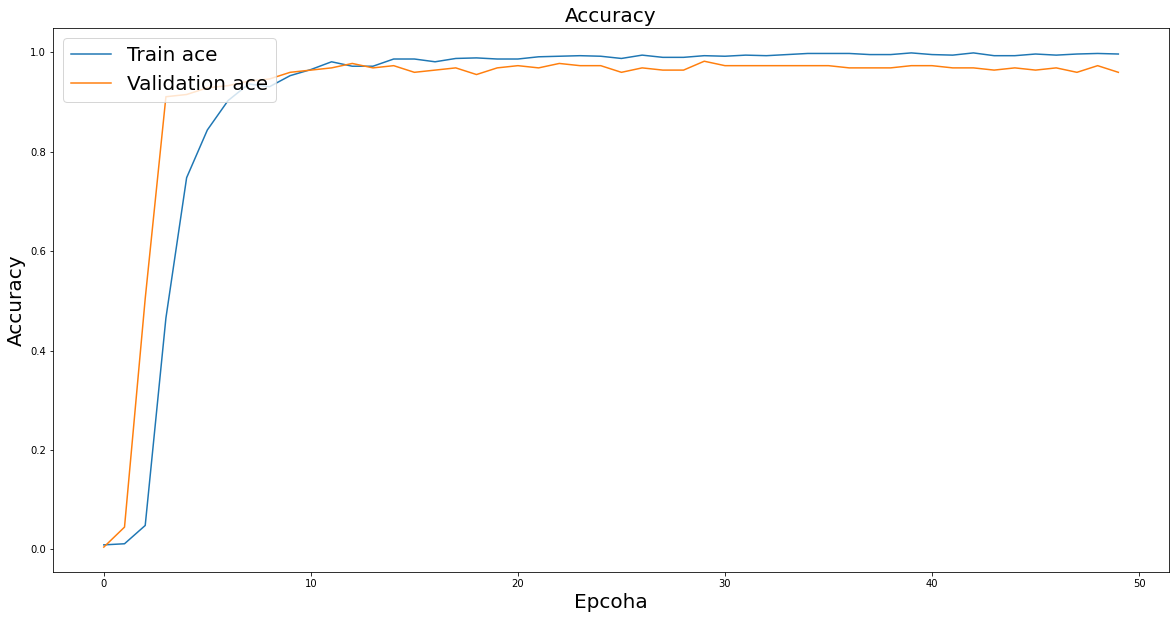

In [248]:
train_loss =  modelfit.history['loss']
val_loss   =  modelfit.history['val_loss']
train_acc  =  modelfit.history['accuracy']
val_acc    =  modelfit.history['val_accuracy']
xc         =range(epochs)

plt.figure(figsize=(20,10))

plt.plot (xc, train_acc, label= 'Train accuracy')

plt.plot (xc, val_acc, label='Validation acuracy') 
plt.legend (loc='upper left', prop={'size': 20})

plt.title("Accuracy", size = 20)

plt.xlabel("Epcoha", size = 20)

plt.ylabel ("Accuracy", size = 20)

In [140]:
nRows,nCols,nDims = train_img.shape[1:]
train_data = train_img.reshape(train_img.shape[0], nRows, nCols, nDims)
test_data = test_img.reshape(test_img.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [142]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_label)
test_labels_one_hot = to_categorical(test_label)

In [143]:
classes = np.unique(train_label)
nClasses = len(classes)

In [144]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Convolution2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [145]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [146]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 200, 150, 32)      896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 198, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 74, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 99, 74, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 99, 74, 64)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 97, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 48, 36, 64)      

In [147]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)


ValueError: ignored